In [99]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup as bs
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

TOPIC: Predictive Analysis of FAANG companies from

INTRODUCTION:

Meta(Facebook), Amazon, Netflix and Google, popularily known as FAANG, have revolutionized and dominated the tech industry for an extended peroiod of time.
Their dominance in the markets has led to a significant increase in the number of investors withtin the tech sector. FAANG has not only revolutionized the tech industry, but the industry's dominance in multiple markets including technology and consumer services has led to major increases in a number of elements pertaining to financial growth. Understanding the process of success in the companies is crucial in determining how these companies will succeed in the future
With these companies being at the top of the technology market for many years, understanding their revenues and values is key in understanding how these companies rose to the top of the market. Understading the global dominance of these companie is an essential part of this process. Investigating the links below will enable you to furthur delve into this subject. 

Exploring FAANG:
https://www.investopedia.com/terms/f/faang-stocks.asp
https://www.forbes.com/advisor/investing/faang-stocks-mamaa/

In light of the surge of FAANG's dominance withtin the tech sector of investment, our project seeks to develop a tool to conduct predictive analysis of Meta, Amazon, Netflix, and Google's stock value. Throughout our model, we cover data from the year 2013 up until 2024, utilizing data such as the stock values as well as Fiscal Annual Revenue between the given time frame. In order to develop more comprehensive data, we calculated the year change in the stock prices for each company in order to acquire a a cleaner data set for the sake of more efficient and accurate computations and interpretations of the stocks' performances. 
The goal of our analysis project is to demonstrate an understanding of how these companies have evolved in terms of their profit and stock pricing. We are accompishing this by utilizing the data that is available to us in order to provide an understanding of how these companies will perform in the future.

1. DATA COLLECTION                

First, we will collect data regarding these companies from the past 7 years from May 15, 2017 until May 15, 2024. The respective csv files for each companies companies the stock prices for each day including the opening price, highest and lowest price in the day, adjusted closing price and the volume of shares traded during the day. For the sake of simplicity, we will not be utilizing the adjusted closing price. 

In [100]:
import pandas as pd

meta_csv = pd.read_csv("meta.csv", sep=",")
amazon_csv = pd.read_csv("amzn.csv", sep=",")
netflix_csv = pd.read_csv("nflx.csv", sep=",")
google_csv = pd.read_csv("goog.csv", sep=",")

def calculate_yearly_change(df):
    df['Date'] = pd.to_datetime(df['Date'])  # Convert Date column to datetime
    df = df.set_index('Date')  # Set the Date column as the index
    start_dates = df.resample('YE').first()  # Resample yearly and get the first date, replace 'Y' with 'YE'
    end_dates = df.resample('YE').last()  # Resample yearly and get the last date, replace 'Y' with 'YE'
    # Calculate difference between opening price of the first day and closing price of the last day of each year
    yearly_change = end_dates['Close'] - start_dates['Open']
    return yearly_change

meta_change = pd.DataFrame(calculate_yearly_change(meta_csv), columns=['Change'])
amazon_change = pd.DataFrame(calculate_yearly_change(amazon_csv), columns=['Change'])
netflix_change = pd.DataFrame(calculate_yearly_change(netflix_csv), columns=['Change'])
google_change = pd.DataFrame(calculate_yearly_change(google_csv), columns=['Change'])




Yearly Price Change for Meta:
                Change
Date                  
2017-12-31   26.290009
2018-12-31  -46.589997
2019-12-31   76.259995
2020-12-31   66.410004
2021-12-31   61.570007
2022-12-31 -217.959992
2023-12-31  231.139991
2024-12-31  130.220002

Yearly Price Change for Apple:
               Change
Date                 
2017-12-31   3.305000
2018-12-31  -3.105000
2019-12-31  34.689998
2020-12-31  58.630004
2021-12-31  44.050003
2022-12-31 -47.900009
2023-12-31  62.250000
2024-12-31   2.570007

Yearly Price Change for Amazon:
               Change
Date                 
2017-12-31  10.536998
2018-12-31  16.498505
2019-12-31  19.131996
2020-12-31  69.096497
2021-12-31   3.216995
2022-12-31 -83.550003
2023-12-31  66.480003
2024-12-31  34.450012

Yearly Price Change for Netflix:
                Change
Date                  
2017-12-31   31.710007
2018-12-31   71.559998
2019-12-31   64.290008
2020-12-31  214.629974
2021-12-31   63.440002
2022-12-31 -310.729980
2023-12-31  188.8

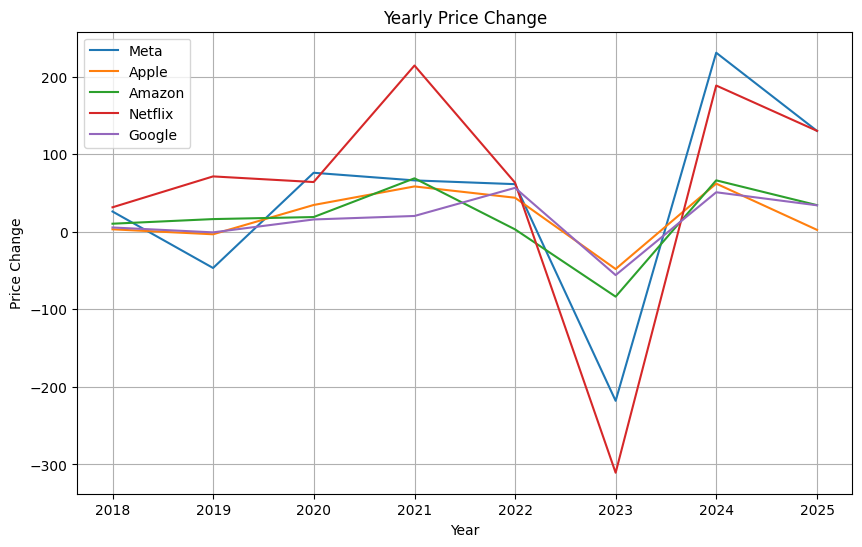

In [101]:
print("Yearly Price Change for Meta:")
print(meta_change)

print("\nYearly Price Change for Amazon:")
print(amazon_change)

print("\nYearly Price Change for Netflix:")
print(netflix_change)

print("\nYearly Price Change for Google:")
print(google_change)

plt.figure(figsize=(10, 6))

plt.plot(meta_change.index, meta_change.values, label='Meta')
plt.plot(amazon_change.index, amazon_change.values, label='Amazon')
plt.plot(netflix_change.index, netflix_change.values, label='Netflix')
plt.plot(google_change.index, google_change.values, label='Google')

plt.title('Yearly Price Change')
plt.xlabel('Year')
plt.ylabel('Price Change')
plt.legend()
plt.grid(True)

plt.show()

The graph above outlines the "Yearly Price Change" for the 5 major tech companies, Meta, Apple, Amazon, Netflix, and Google (FAANG), over the years from 2017 to 
2024. The value of "Yearly Price Change" is calculated by identifying the change in the opening and closing prices of each stock from the start and end of the year. The result outlines a number of important elemnts for the relvancy of this project. In terms of market volatility, this graph highlights the inherent volatility of the stock market, particularly for tech stocks. For exmaple, the sharp declines in 2022 can be attributed to factors including inflation and interest rate hikes which were major market drivers at the time. In addition, the effects of the pandamic are showcased due to the significant gains in 2020 for companies like Amazon and Netflix. This reflects the market's increased demand for e-commerce and streaming services during the pandemic time period. Additionally, the recovery of the tech sector in 2023 suggests a major resilience within the industry. Overall these factors are all major market factors and can a play a huge role in predicting the future success of these stocks. Threfore, it will be important to consider that these additional factors can play a huge role in our data prediction model. Additional Information on these factors can be explored below:

Information on the 2022 Inflation Rate Hikes:
https://www.statista.com/statistics/273418/unadjusted-monthly-inflation-rate-in-the-us/#:~:text=More%20information%20on%20U.S.%20inflation,to%208.3%20percent%20in%202022.

Impact of Covid-19 on Streaming Platforms:
https://www.thinkwithgoogle.com/consumer-insights/consumer-trends/video-streaming-wars/

In terms of the individual change in the annual price changes for these companies in the specified time period, each comapany faced its own varying level of changes in the anuual price change. Here is a summary of these changes:

Apple (Orange Line)
Apple's stock price fluctuated slightly from 2017 to 2019, with a minor dip in 2018, followed by significant increases in 2019 and 2020. The upward trend continued in 2021, but the stock saw a sharp decline in 2022. After this, recovered notably in 2023, and showed a minor increase in 2024, indicating stabilization.

Amazon (Green Line)
Amazon maintained steady growth from 2017 to 2019, experienced a significant surge in 2020, and stabilized in 2021. The stock faced a steep decline in 2022 but recovered considerably in 2023 and continued to grow positively in 2024, though at a reduced rate.

Netflix (Red Line)
Netflix saw substantial positive changes from 2017 to 2020, peaking in 2020, and continued to grow at a slower pace in 2021. The stock experienced a dramatic downturn in 2022, recovered sharply in 2023, and had a positive but less dramatic increase in 2024.

Google (Purple Line)
Google's stock price exhibited modest, consistent changes from 2017 to 2019, followed by a moderate increase in 2020 and a significant rise in 2021. The trend reversed with a notable decline in 2022, but the stock saw significant positive changes in 2023 and continued to rise at a measured pace in 2024.

Now to create a predictve analysis of FAANG companies stock in the future, we will be utilizing data from their fiscal year revenue for each year in the time frame mentioned. 

  Fiscal Year End  Revenue (billions)  Change (billions)  Growth (percentage)
0      2023-12-31              134.90              18.29                15.69
1      2022-12-31              116.61              -1.32                -1.12
2      2021-12-31              117.93              31.96                37.18
3      2020-12-31               85.97              15.27                21.60
4      2019-12-31               70.70              14.86                26.61
5      2018-12-31               55.84              15.19                37.35
6      2017-12-31               40.65              13.02                47.09
7      2016-12-31               27.64               9.71                54.16
  Fiscal Year End  Revenue (billions)  Change (billions)  Growth (percentage)
0      2023-12-31              383.29             -11.04                -2.80
1      2022-11-30              394.33              28.51                 7.79
2      2021-11-30              365.82              91.30        

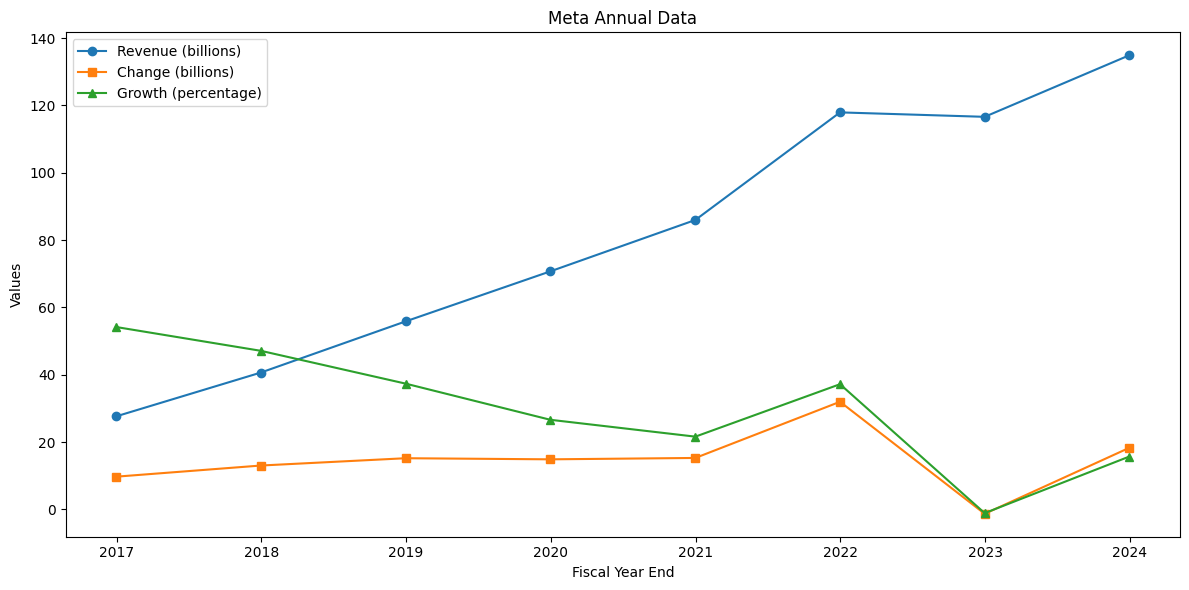

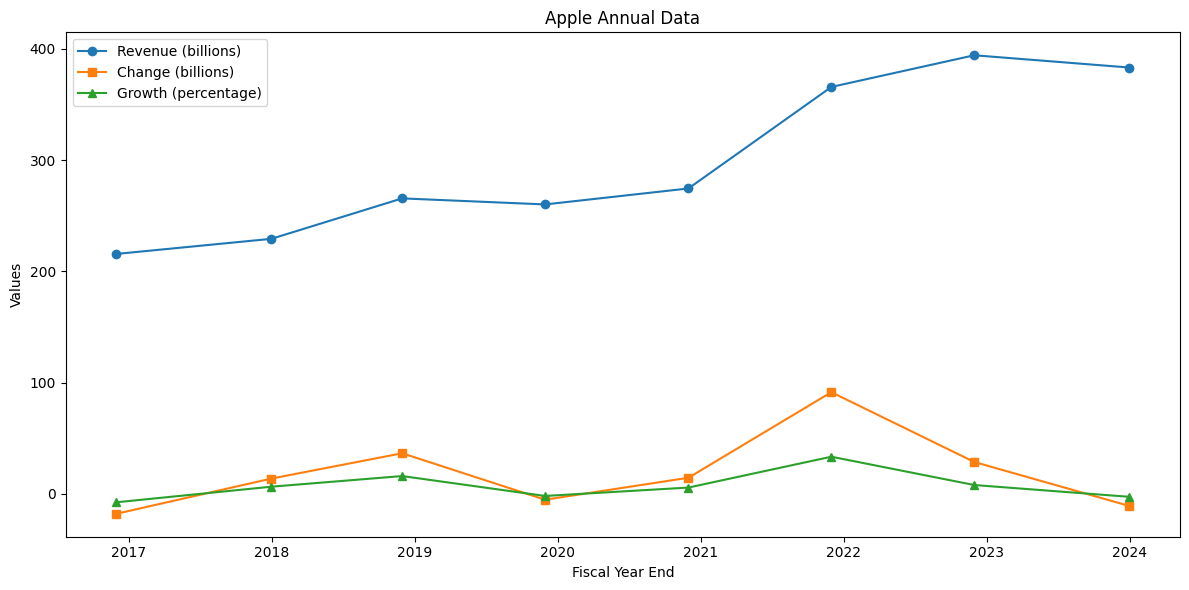

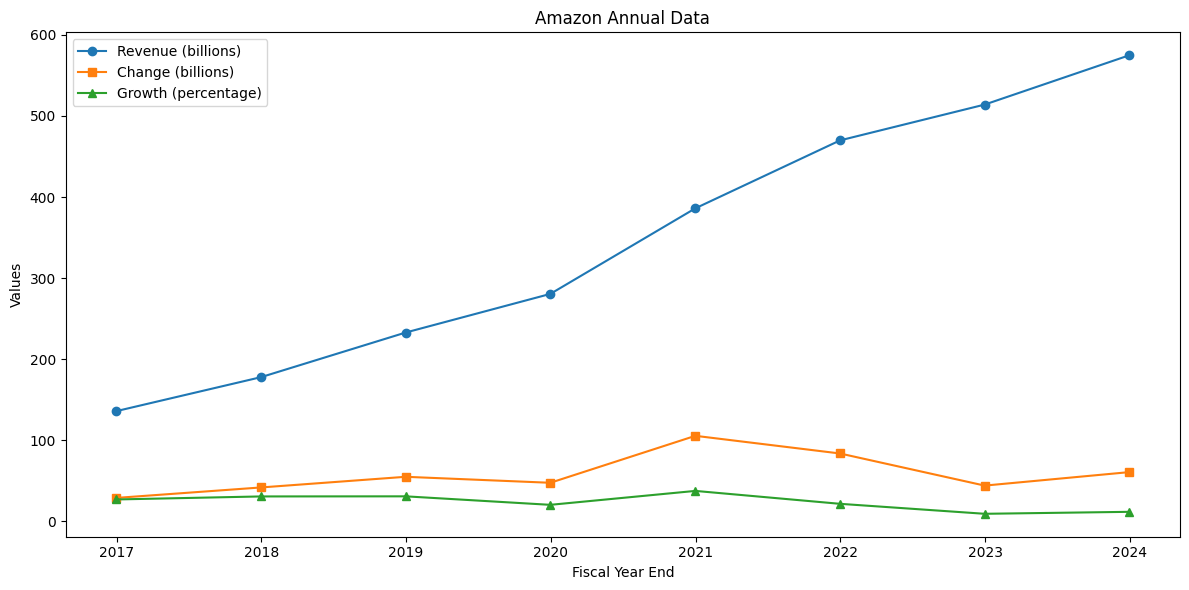

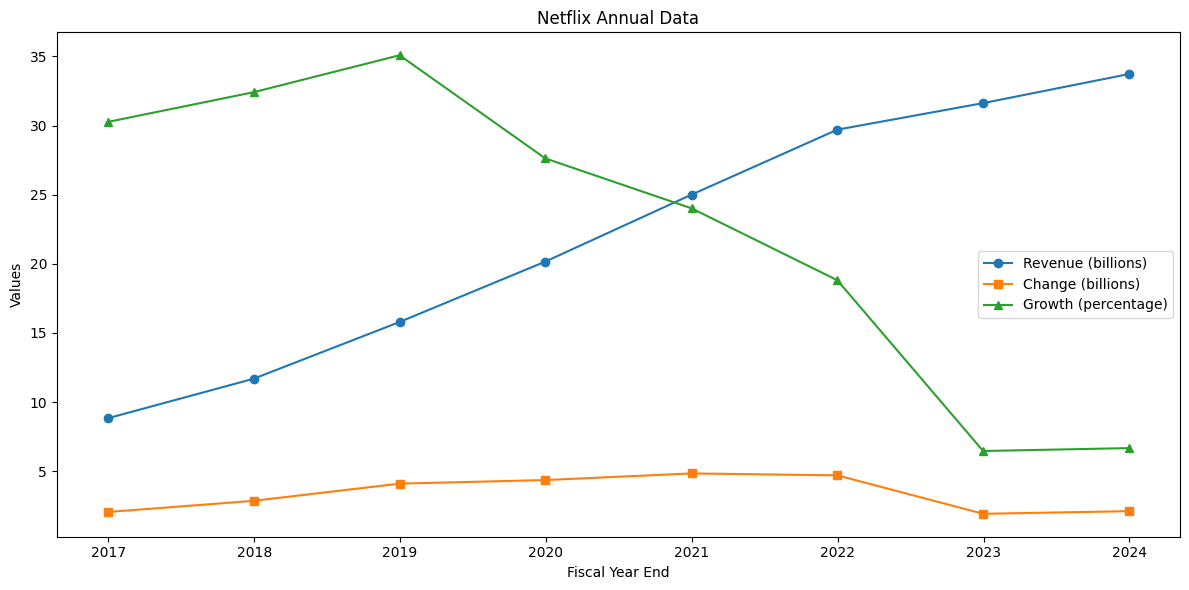

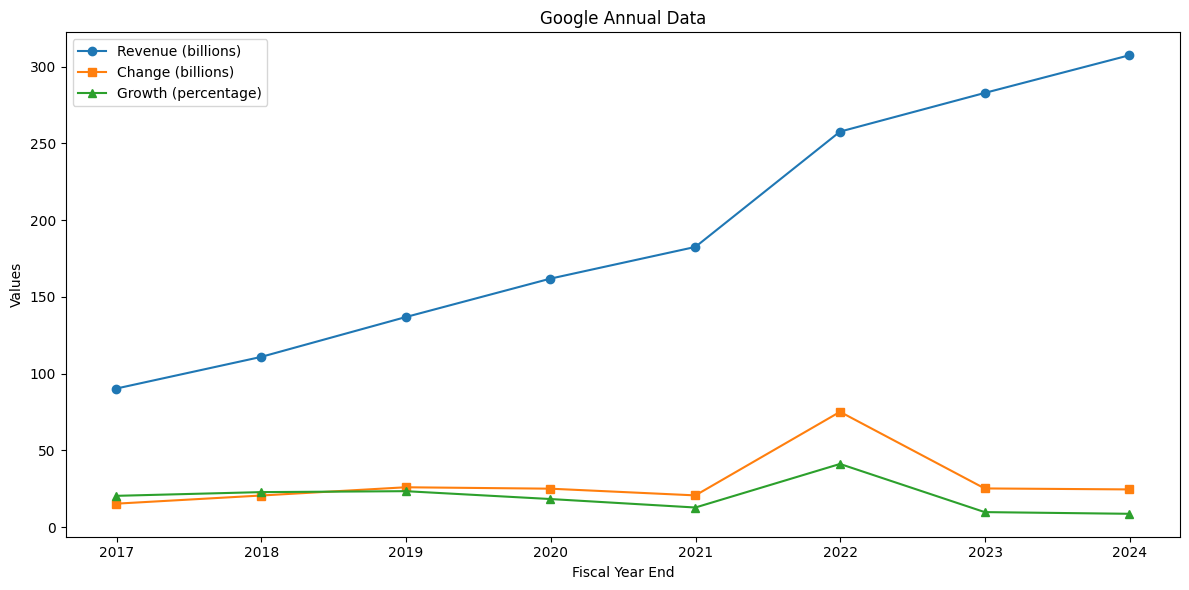

In [102]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
import matplotlib.pyplot as plt


def tableFinder(company, month_day_filter=None):
    url_first_half = 'https://stockanalysis.com/stocks/'
    url_sec_half = '/revenue/#'
    url = url_first_half + company + url_sec_half
    r = requests.get(url)
    cont = r.text
    bsoup = bs(cont, 'html.parser')
    table = bsoup.find('table')

    if table is None:
        raise ValueError(f"No table found for company {company} on the page.")

    col_headers = ['Fiscal Year End',
                   'Revenue (billions)', 'Change (billions)', 'Growth (percentage)']
    rows = []
    for row in table.find_all('tr')[1:]:
        cols = row.find_all('td')
        cols = [col.text.strip() for col in cols]

        if len(cols) >= 2:
            cols[1] = cols[1].replace('B', '').strip()
        if len(cols) >= 3:
            cols[2] = cols[2].replace('B', '').strip()
        if len(cols) >= 4:
            cols[3] = cols[3].replace('%', '').strip()

        rows.append(cols)

    df = pd.DataFrame(rows, columns=col_headers)

    df['Fiscal Year End'] = pd.to_datetime(df['Fiscal Year End'])
    df = df[df['Fiscal Year End'].dt.year >= 2016]

    if month_day_filter:
        df = df[(df['Fiscal Year End'].dt.month == month_day_filter[0])
                & (df['Fiscal Year End'].dt.day == month_day_filter[1])]

    df['Revenue (billions)'] = pd.to_numeric(
        df['Revenue (billions)'], errors='coerce')
    df['Change (billions)'] = pd.to_numeric(
        df['Change (billions)'], errors='coerce')
    df['Growth (percentage)'] = pd.to_numeric(
        df['Growth (percentage)'], errors='coerce')

    df['Revenue (billions)'] = df['Revenue (billions)'].astype(float)
    df['Change (billions)'] = df['Change (billions)'].astype(float)
    df['Growth (percentage)'] = df['Growth (percentage)'].astype(float)

    return df


def tableFinderApple():
    url_first_half = 'https://stockanalysis.com/stocks/'
    url_sec_half = '/revenue/#'
    url = url_first_half + 'aapl' + url_sec_half
    r = requests.get(url)
    cont = r.text
    bsoup = bs(cont, 'html.parser')
    table = bsoup.find('table')

    if table is None:
        raise ValueError(f"No table found for company Apple on the page.")

    col_headers = ['Fiscal Year End',
                   'Revenue (billions)', 'Change (billions)', 'Growth (percentage)']
    rows = []
    for row in table.find_all('tr')[1:]:
        cols = row.find_all('td')
        cols = [col.text.strip() for col in cols]

        if len(cols) >= 2:
            cols[1] = cols[1].replace('B', '').strip()
        if len(cols) >= 3:
            cols[2] = cols[2].replace('B', '').strip()
        if len(cols) >= 4:
            cols[3] = cols[3].replace('%', '').strip()

        rows.append(cols)

    df = pd.DataFrame(rows, columns=col_headers)

    df['Fiscal Year End'] = pd.to_datetime(df['Fiscal Year End'])
    df = df[(df['Fiscal Year End'].dt.year >= 2016) & (df['Fiscal Year End'].dt.year != 2024)]
    # Shift to December 31st
    df['Fiscal Year End'] = df['Fiscal Year End'] + pd.offsets.MonthEnd(3)

    df['Revenue (billions)'] = pd.to_numeric(
        df['Revenue (billions)'], errors='coerce')
    df['Change (billions)'] = pd.to_numeric(
        df['Change (billions)'], errors='coerce')
    df['Growth (percentage)'] = pd.to_numeric(
        df['Growth (percentage)'], errors='coerce')

    df['Revenue (billions)'] = df['Revenue (billions)'].astype(float)
    df['Change (billions)'] = df['Change (billions)'].astype(float)
    df['Growth (percentage)'] = df['Growth (percentage)'].astype(float)

    return df


meta_rev_table = tableFinder("meta", (12, 31))
amazon_rev_table = tableFinder('amzn', (12, 31))
netflix_rev_table = tableFinder("nflx", (12, 31))
google_rev_table = tableFinder('goog', (12, 31))

print(meta_rev_table)
print(amazon_rev_table)
print(netflix_rev_table)
print(google_rev_table)


def plot_revenue_data(df, company):
    plt.figure(figsize=(12, 6))
    plt.plot(df['Fiscal Year End'], df['Revenue (billions)'],
             marker='o', label='Revenue (billions)')
    plt.plot(df['Fiscal Year End'], df['Change (billions)'],
             marker='s', label='Change (billions)')
    plt.plot(df['Fiscal Year End'], df['Growth (percentage)'],
             marker='^', label='Growth (percentage)')
    plt.xlabel('Fiscal Year End')
    plt.ylabel('Values')
    plt.title(f'{company} Annual Data')
    plt.legend()
    plt.tight_layout()
    plt.show()


plot_revenue_data(meta_rev_table, "Meta")
plot_revenue_data(amazon_rev_table, "Amazon")
plot_revenue_data(netflix_rev_table, "Netflix")
plot_revenue_data(google_rev_table, "Google")


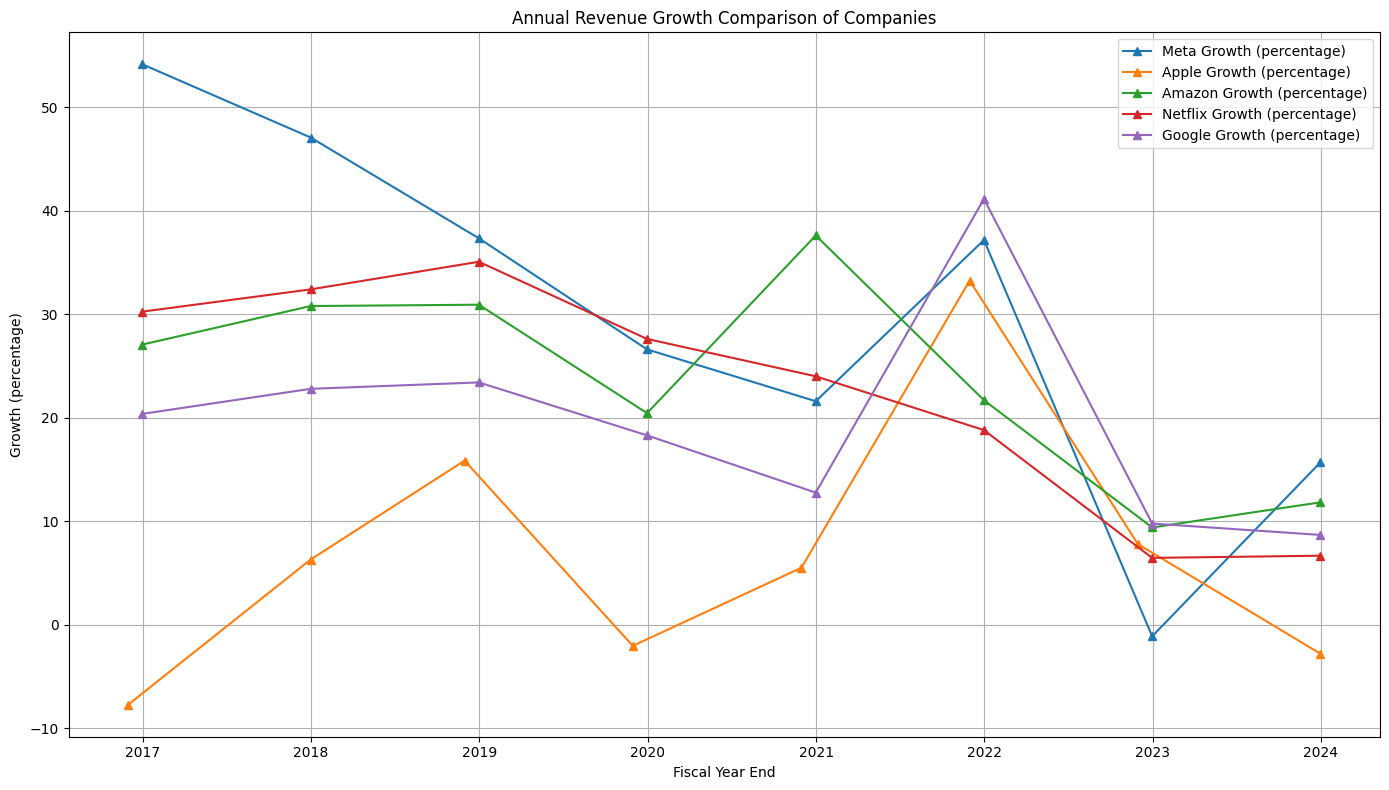

In [103]:
def plot_all_revenue_data(datasets, companies):
    plt.figure(figsize=(14, 8))  
    
    for data, company in zip(datasets, companies):
        plt.plot(data['Fiscal Year End'], data['Growth (percentage)'],
                 marker='^', label=f'{company} Growth (percentage)')

    plt.xlabel('Fiscal Year End')
    plt.ylabel('Growth (percentage)')
    plt.title('Annual Revenue Growth Comparison of Companies')
    plt.legend()
    plt.tight_layout()
    plt.grid(True)  
    plt.show()

datasets = [meta_rev_table, apple_rev_table, amazon_rev_table, netflix_rev_table, google_rev_table]
companies = ["Meta", "Apple", "Amazon", "Netflix", "Google"]

plot_all_revenue_data(datasets, companies)

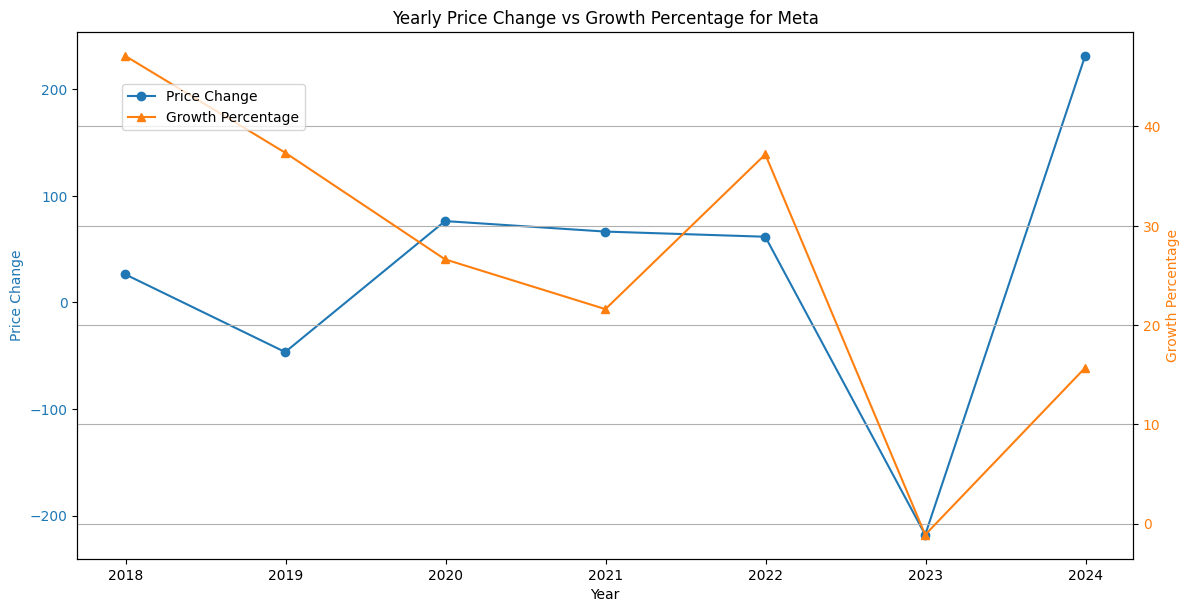

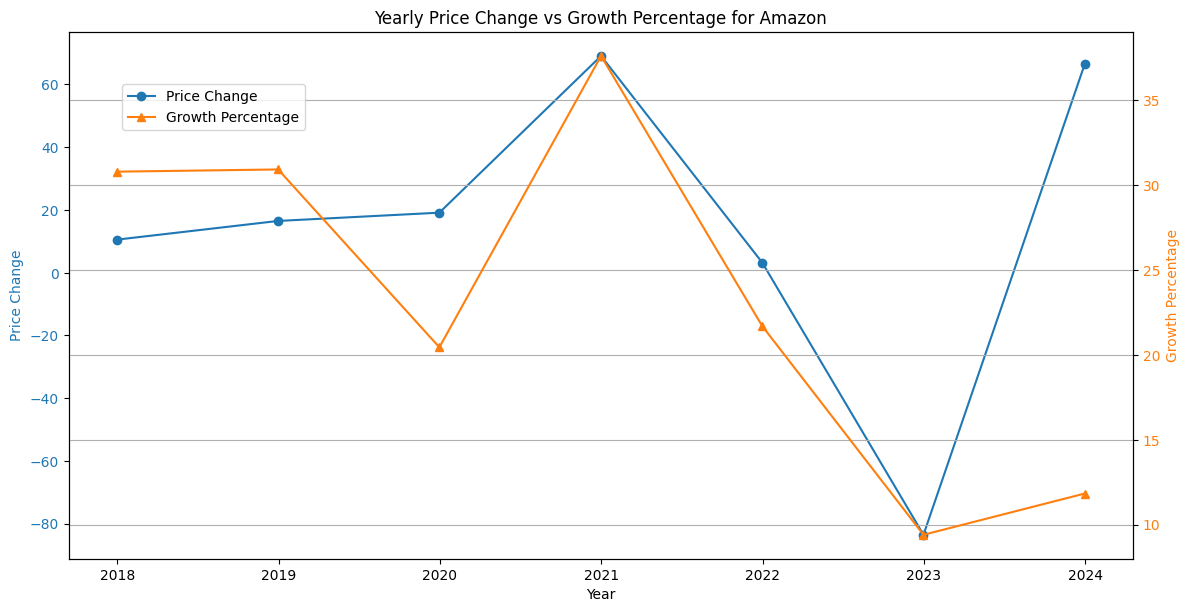

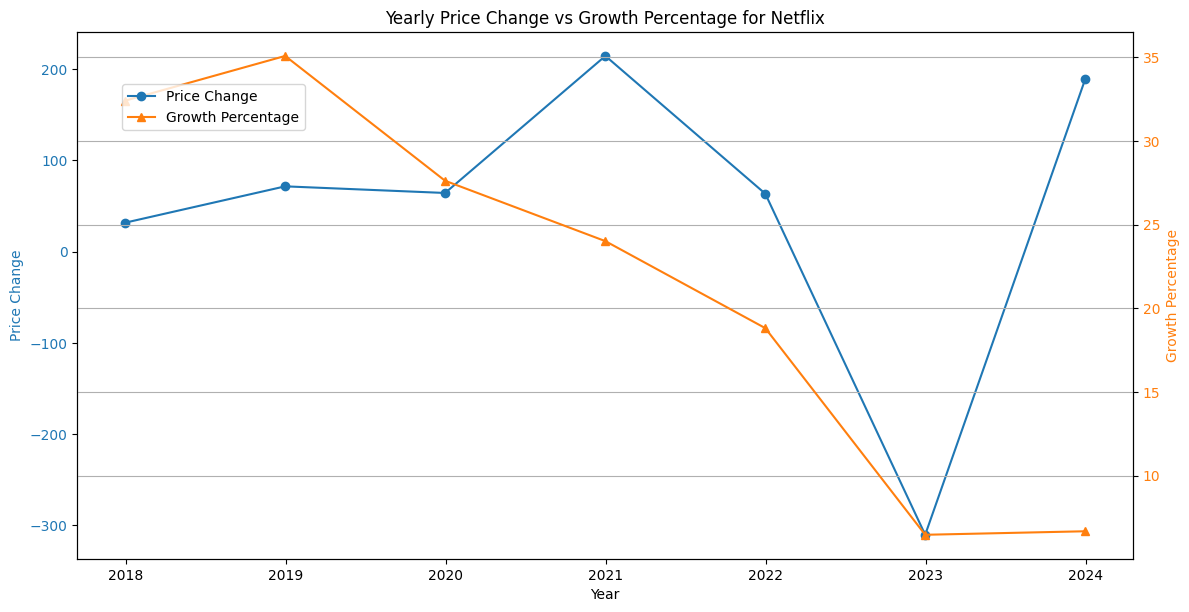

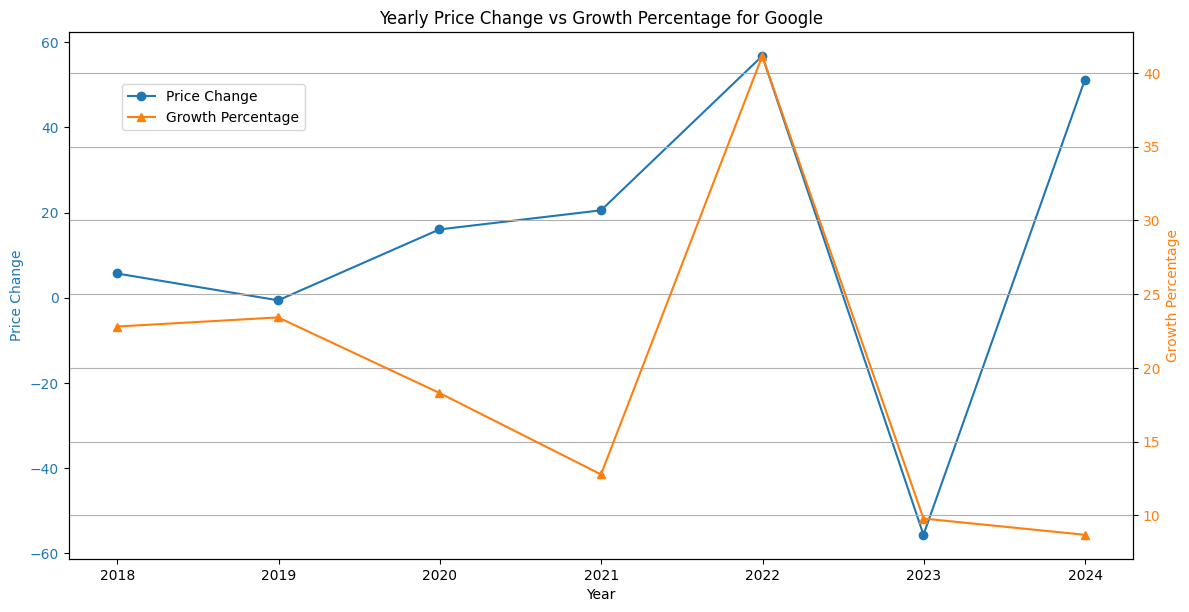

In [104]:
def merge_data(yearly_change, revenue_data):
    merged_df = yearly_change.join(revenue_data.set_index('Fiscal Year End')['Growth (percentage)'], how='inner')
    return merged_df

meta_merged = merge_data(meta_change, meta_rev_table)
amazon_merged = merge_data(amazon_change, amazon_rev_table)
netflix_merged = merge_data(netflix_change, netflix_rev_table)
google_merged = merge_data(google_change, google_rev_table)

# Plotting function for the dual-axis graph
def plot_growth_vs_price_change(merged_df, company_name):
    fig, ax1 = plt.subplots(figsize=(12, 6))

    ax1.set_xlabel('Year')
    ax1.set_ylabel('Price Change', color='tab:blue')
    ax1.plot(merged_df.index, merged_df['Change'], color='tab:blue', marker='o', label='Price Change')
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    ax2.set_ylabel('Growth Percentage', color='tab:orange')  # we already handled the x-label with ax1
    ax2.plot(merged_df.index, merged_df['Growth (percentage)'], color='tab:orange', marker='^', label='Growth Percentage')
    ax2.tick_params(axis='y', labelcolor='tab:orange')

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.title(f'Yearly Price Change vs Growth Percentage for {company_name}')
    fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))
    plt.grid()
    plt.show()

# Plot for each company
plot_growth_vs_price_change(meta_merged, 'Meta')
plot_growth_vs_price_change(amazon_merged, 'Amazon')
plot_growth_vs_price_change(netflix_merged, 'Netflix')
plot_growth_vs_price_change(google_merged, 'Google')

START HERE FOR MACHINE LEARNING

   In this section We start by creating two DataFrames: `(company)_change`, which contains the yearly change in Meta's stock price, and `(company)_rev_table`, which contains the yearly revenue, change in revenue, and revenue growth percentage.
    - We then merge these two DataFrames on their corresponding date columns (`Date` and `Fiscal Year End`) to create a combined DataFrame that includes both stock price changes and revenue growth percentages.
    - From the combined DataFrame, we filter out only the `Change` and `Growth (percentage)` columns to focus on these two variables for our regression analysis.

In [105]:
combined_df = pd.merge(meta_change, meta_rev_table, left_on='Date', right_on='Fiscal Year End')
filtered_meta = combined_df[['Change', 'Growth (percentage)']]

combined_df = pd.merge(amazon_change, amazon_rev_table, left_on='Date', right_on='Fiscal Year End')
filtered_amazon = combined_df[['Change', 'Growth (percentage)']]

combined_df = pd.merge(netflix_change, netflix_rev_table, left_on='Date', right_on='Fiscal Year End')
filtered_netflix = combined_df[['Change', 'Growth (percentage)']]

combined_df = pd.merge(google_change, google_rev_table, left_on='Date', right_on='Fiscal Year End')
filtered_google = combined_df[['Change', 'Growth (percentage)']]

filtered_meta

,Change,Growth (percentage)
0,26.290009,47.09
1,-46.589997,37.35
2,76.259995,26.61
3,66.410004,21.60
4,61.570007,37.18
5,-217.959992,-1.12
6,231.139991,15.69


In [106]:
filtered_amazon

,Change,Growth (percentage)
0,10.536998,30.80
1,16.498505,30.93
2,19.131996,20.45
3,69.096497,37.62
4,3.216995,21.70
5,-83.550003,9.40
6,66.480003,11.83


In [107]:
filtered_netflix

,Change,Growth (percentage)
0,31.710007,32.41
1,71.559998,35.08
2,64.290008,27.62
3,214.629974,24.01
4,63.440002,18.81
5,-310.729980,6.46
6,188.820007,6.67


In [108]:
filtered_google

,Change,Growth (percentage)
0,5.672501,22.80
1,-0.636501,23.42
2,16.022499,18.30
3,20.516503,12.77
4,56.802505,41.15
5,-55.745491,9.78
6,51.099991,8.68


### Linear Regression Analysis: Predicting Stock Price Change from Revenue Growth

In this section, we are performing a linear regression analysis to predict the change in The companies in FAANG's stock price based on the growth percentage of its revenue. Below is a step by step description of the process:


This is a description for what we did for meta:

1. **Data Preparation**:
    - We start by creating two DataFrames: `meta_change`, which contains the yearly change in Meta's stock price, and `meta_rev_table`, which contains the yearly revenue, change in revenue, and revenue growth percentage.
    - We then merge these two DataFrames on their corresponding date columns (`Date` and `Fiscal Year End`) to create a combined DataFrame that includes both stock price changes and revenue growth percentages.
    - From the combined DataFrame, we filter out only the `Change` and `Growth (percentage)` columns to focus on these two variables for our regression analysis.

2. **Setting Up the Data**:
    - The `Growth (percentage)` column is set as the independent variable X which will be considrered the feature. Then we had reshaped to a 2D array.
    - The `Change` column is set as the dependent variable X which is the target.
    - This table is the main two variables we need to perform the linear regression analysis.

3. **Creating and Training the Linear Regression Model**:
    - We create an instance of the `LinearRegression` model.
    - We train the model using the `fit` method, passing the independent variable X and the dependent variable Y.

4. **Making Predictions**:
    - Using the trained model, we make predictions for the stock price changes based on the revenue growth percentages using the `predict` method.
    - We compare the predicted values with the actual values to assess the model's performance visually.

5. **Evaluating the Model**:
    - We evaluate the model's performance by calculating the Mean Squared Error (MSE) and the R-squared (R²) score using the `mean_squared_error` and `r2_score` functions from scikit-learn.
    - The MSE measures the average squared difference between the actual and predicted values, while the R² score indicates the proportion of the variance in the dependent variable that is predictable from the independent variable.
    

6. **Visualizing the Results**:
    - We create a scatter plot of the actual data points (stock price changes vs. revenue growth percentages).
    - We also plot the regression line (predicted values) to visualize the fit of the model.
    - The x-axis represents the revenue growth percentage, and the y-axis represents the change in stock price.
    - The plot includes labels, a title, and a legend to distinguish between actual data points and the regression line.

By following these steps, we aim to understand how well the growth percentage of Meta's revenue can predict the change in its stock price using a simple linear regression model.

Then we did the same steps for each of the other FAANG companies to see how accurate our model is.

Mean Squared Error: 14623.015502129096
R^2 Score: 0.0881773424770993


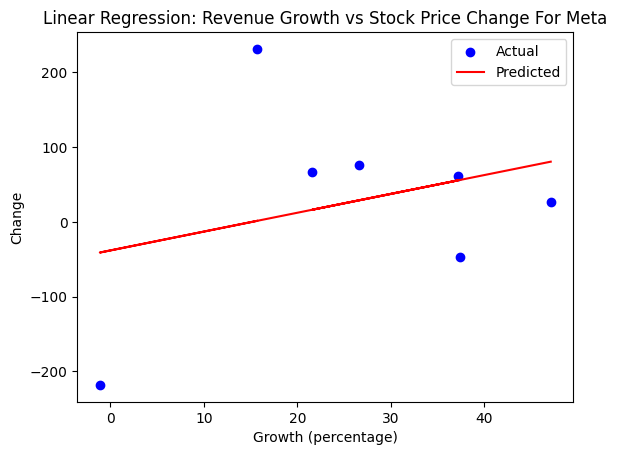

In [109]:
# Prepare the data
X = filtered_meta[['Growth (percentage)']].values.reshape(-1, 1)  # Independent variable
y = filtered_meta['Change'].values  # Dependent variable

# Create and train the model
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Evaluate the model
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

# Print the evaluation metrics
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Plot the results
plt.scatter(X, y, color='blue', label='Actual')
plt.plot(X, y_pred, color='red', label='Predicted')
plt.xlabel('Growth (percentage)')
plt.ylabel('Change')
plt.title('Linear Regression: Revenue Growth vs Stock Price Change For Meta')
plt.legend()
plt.show()

### Interpretation of Results

1. **Mean Squared Error (MSE)**:
   - The MSE value is 14623.015502129096.
   - A higher MSE indicates a larger average error, meaning that the model's predictions are, on average, quite far from the actual values.
   - In this case, the high MSE suggests that the model's predictions are not very accurate and that there is a significant discrepancy between the predicted and actual stock price changes.

2. **R-squared (R²) Score**:
   - The R² score is 0.0881773424770993.
   - The R² score of approximately 0.088 indicates that only about 8.8% of the variance in stock price change is explained by the revenue growth percentage.
   - This low R² score suggests that the revenue growth percentage is not a strong predictor of the stock price change for Meta, and there are likely other factors.

Mean Squared Error: 1692.7517953726183
R^2 Score: 0.23379939635722224


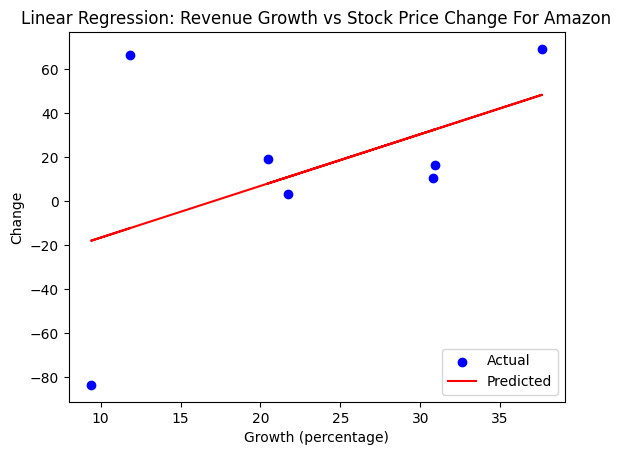

In [110]:
# Prepare the data
X = filtered_amazon[['Growth (percentage)']].values.reshape(-1, 1)  # Independent variable
y = filtered_amazon['Change'].values  # Dependent variable

# Create and train the model
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Evaluate the model
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

# Print the evaluation metrics
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Plot the results
plt.scatter(X, y, color='blue', label='Actual')
plt.plot(X, y_pred, color='red', label='Predicted')
plt.xlabel('Growth (percentage)')
plt.ylabel('Change')
plt.title('Linear Regression: Revenue Growth vs Stock Price Change For Amazon')
plt.legend()
plt.show()

**Mean Squared Error (MSE)**: 1692.7517953726183  
**R-squared (R²) Score**: 0.23379939635722224

1. **Mean Squared Error (MSE)**:
   - The MSE value is 1692.7517953726183.
   - In this case, the MSE of approximately 1692.75 suggests that the model's predictions are relatively close to the actual values, but there is still a significant error present.

2. **R-squared (R²) Score**:
   - The R² score is 0.23379939635722224.
   - An R² score of approximately 0.234 indicates that about 23.4% of the variance in stock price change is explained by the revenue growth percentage.
   - While this shows some level of predictive power, it also suggests that 76.6% of the variance in stock price change is influenced by factors not included in the model.

Mean Squared Error: 22618.003867568677
R^2 Score: 0.10845270612207558


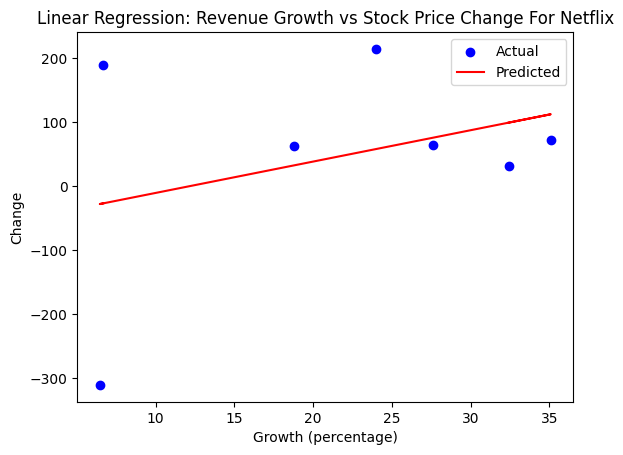

In [111]:
# Prepare the data
X = filtered_netflix[['Growth (percentage)']].values.reshape(-1, 1)  # Independent variable
y = filtered_netflix['Change'].values  # Dependent variable

# Create and train the model
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Evaluate the model
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

# Print the evaluation metrics
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Plot the results
plt.scatter(X, y, color='blue', label='Actual')
plt.plot(X, y_pred, color='red', label='Predicted')
plt.xlabel('Growth (percentage)')
plt.ylabel('Change')
plt.title('Linear Regression: Revenue Growth vs Stock Price Change For Netflix')
plt.legend()
plt.show()

**Mean Squared Error (MSE)**: 22618.003867568677  
**R-squared (R²) Score**: 0.10845270612207558

1. **Mean Squared Error (MSE)**:
   - The MSE value is 22618.003867568677.
   - In this case, the high MSE suggests that the model's predictions for Netflix's stock price changes are not very accurate and that there is a significant discrepancy between the predicted and actual stock price changes.

2. **R-squared (R²) Score**:
   - The R² score is 0.10845270612207558.
   - In this case, the R² score of approximately 0.108 indicates that only about 10.8% of the variance in stock price change is explained by the revenue growth percentage.
   - This low R² score suggests that the revenue growth percentage is not a strong predictor of Netflix's stock price change, and there are likely other factors.

Mean Squared Error: 981.994668824256
R^2 Score: 0.18171248582086863


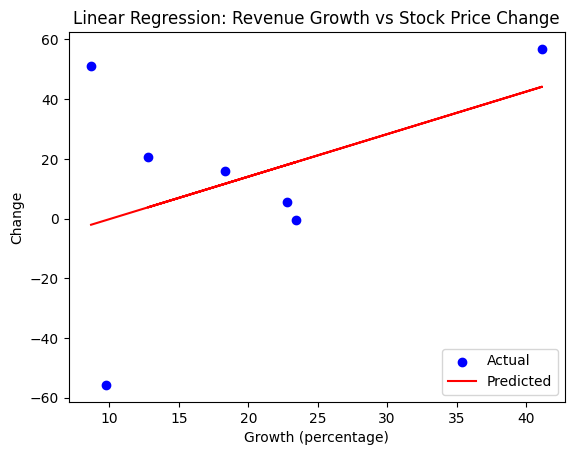

In [112]:
# Prepare the data
X = filtered_google[['Growth (percentage)']].values.reshape(-1, 1)  # Independent variable
y = filtered_google['Change'].values  # Dependent variable

# Create and train the model
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Evaluate the model
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

# Print the evaluation metrics
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Plot the results
plt.scatter(X, y, color='blue', label='Actual')
plt.plot(X, y_pred, color='red', label='Predicted')
plt.xlabel('Growth (percentage)')
plt.ylabel('Change')
plt.title('Linear Regression: Revenue Growth vs Stock Price Change')
plt.legend()
plt.show()

**Mean Squared Error (MSE)**: 981.994668824256  
**R-squared (R²) Score**: 0.18171248582086863

1. **Mean Squared Error (MSE)**:
   - The MSE value is 981.994668824256.
   - In this case, the MSE of approximately 982 suggests that the model's predictions are relatively close to the actual values, but there is still some error present.

2. **R-squared (R²) Score**:
   - The R² score is 0.18171248582086863.
   - An R² score of approximately 0.182 indicates that about 18.2% of the variance in stock price change is explained by the revenue growth percentage.
   - While this shows some level of predictive power, it also suggests that 81.8% of the variance in stock price change is influenced by other factors.